## Collecting the Birmingham postcode data with longitude and latitude values

In [1]:
#Import all relevant libraries for the project

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  24.59 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  37.23 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  55.00 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  32.44 MB/s
vincent-0.4.4- 100% |###################

In [2]:
#The data comes from a csv file from https://www.freemaptools.com/download-uk-postcode-lat-lng.htm
#The csv file is downloaded and added as a data asset into watson studio.
#The below is an automatically generated code when using a data asset from watson studio in your project.

import types

from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

#note, code removed as it contains access key for ibm watson account

,id,postcode,latitude,longitude
0,2,AB10,57.13514,-2.11731
1,3,AB11,57.13875,-2.09089
2,4,AB12,57.10100,-2.11060
3,5,AB13,57.10801,-2.23776
4,6,AB14,57.10076,-2.27073


In [27]:
#Separate the large list of all postcode outcodes to just those beginining with B (i.e. areas in Birmingham)

birmingham_data = all_postcodes[43:120]

#index is reset for this list
birmingham_data.reset_index(inplace = True)

#The id and index columns are not required
birmingham_data.drop(["index","id"], axis = 1, inplace= True)
birmingham_data

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,postcode,latitude,longitude
0,B1,52.47872,-1.90723
1,B10,52.46967,-1.85130
2,B11,52.45440,-1.85871
3,B12,52.45982,-1.88225
4,B13,52.43644,-1.87790
5,B14,52.41757,-1.88824
6,B15,52.46615,-1.92345
7,B16,52.47604,-1.93374
8,B17,52.46077,-1.96026
9,B18,52.49132,-1.92341


In [37]:
#77 outcodes are left, which will be used for the geographical data

birmingham_data.shape

(77, 3)

In [5]:
address = 'Birmingham, UK'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Birmingham are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Birmingham are 52.4775396, -1.894053.


In [6]:
# create map of New York using latitude and longitude values
map_birmingham = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postcode in zip(birmingham_data['latitude'], birmingham_data['longitude'], birmingham_data['postcode']):
    label = '{}'.format(postcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_birmingham )  
    
map_birmingham 

In [ ]:
CLIENT_ID = 'secret' # your Foursquare ID
CLIENT_SECRET = 'secrret' # your Foursquare Secret
VERSION = 'secret' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['postcode', 
                  'postcode Latitude', 
                  'postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [62]:
LIMIT = 100

birmingham_venues = getNearbyVenues(names=birmingham_data['postcode'],
                                   latitudes=birmingham_data['latitude'],
                                   longitudes=birmingham_data['longitude']
                                  )

B1
B10
B11
B12
B13
B14
B15
B16
B17
B18
B19
B2
B20
B21
B23
B24
B25
B26
B27
B28
B29
B3
B30
B31
B32
B33
B34
B35
B36
B37
B38
B4
B40
B42
B43
B44
B45
B46
B47
B48
B49
B5
B50
B6
B60
B61
B62
B63
B64
B65
B66
B67
B68
B69
B7
B70
B71
B72
B73
B74
B75
B76
B77
B78
B79
B8
B80
B9
B90
B91
B92
B93
B94
B95
B96
B97
B98


In [63]:
print(birmingham_venues.shape)
birmingham_venues.head()

(2162, 7)


,postcode,postcode Latitude,postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,B1,52.47872,-1.90723,Symphony Hall,52.478874,-1.910229,Concert Hall
1,B1,52.47872,-1.90723,Birmingham Museum & Art Gallery,52.480385,-1.903905,History Museum
2,B1,52.47872,-1.90723,Birmingham Town Hall,52.479509,-1.903560,Concert Hall
3,B1,52.47872,-1.90723,Hyatt Regency Birmingham,52.478096,-1.909324,Hotel
4,B1,52.47872,-1.90723,The Canal House,52.477396,-1.909070,Bar


In [64]:
birmingham_venues.groupby('postcode').count()

,postcode Latitude,postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
postcode,,,,,,
B1,100,100,100,100,100,100
B10,24,24,24,24,24,24
B11,20,20,20,20,20,20
B12,49,49,49,49,49,49
B13,56,56,56,56,56,56
B14,18,18,18,18,18,18
B15,67,67,67,67,67,67
B16,77,77,77,77,77,77
B17,48,48,48,48,48,48


In [65]:
print('There are {} uniques categories.'.format(len(birmingham_venues['Venue Category'].unique())))

There are 213 uniques categories.


In [66]:
# one hot encoding
birmingham_onehot = pd.get_dummies(birmingham_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
birmingham_onehot['postcode'] = birmingham_venues['postcode'] 

# move neighborhood column to the first column
fixed_columns = [birmingham_onehot.columns[-1]] + list(birmingham_onehot.columns[:-1])
birmingham_onehot = birmingham_onehot[fixed_columns]

birmingham_onehot.head()

,postcode,Airport,Airport Lounge,Airport Terminal,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Baby Store,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Canal,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Soccer Field,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,North Indian Restaurant,Office,Optical Shop,Outdoor Supply Store,Outlet Mall,Outlet Store,Paintball Field,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Record Shop,Rental Car Location,Reservoir,Rest Area,Restaurant,Rock Club,Rugby Pitch,Rugby Stadium,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Repair,Shopping Mall,Shopping Plaza,Ski Area,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store
0,B1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,B1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,B1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
birmingham_grouped = birmingham_onehot.groupby('postcode').mean().reset_index()
birmingham_grouped

,postcode,Airport,Airport Lounge,Airport Terminal,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Baby Store,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Café,Canal,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Soccer Field,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Ethiopian Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,North Indian Restaurant,Office,Optical Shop,Outdoor Supply Store,Outlet Mall,Outlet Store,Paintball Field,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Racetrack,Record Shop,Rental Car Location,Reservoir,Rest Area,Restaurant,Rock Club,Rugby Pitch,Rugby Stadium,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Repair,Shopping Mall,Shopping Plaza,Ski Area,Soccer Field,Soccer Stadium,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store
0,B1,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000,0.010000,0.000000,0.000000,0.000,0.000000,0.000000,0.090000,0.000000,0.020000,0.000000,0.00,0.020000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.020000,0.00,0.000000,0.000000,0.000000,0.020000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.070000,0.080000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,0.00,0.01,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.030000,0.000000,0.0,0.000000,0.060000,0.010000,0.000000,0.000000,0.000000,0.050000,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.0

In [68]:
birmingham_grouped.shape

(77, 214)

In [70]:
num_top_venues = 5

for postcode in birmingham_data['postcode']:
    print("----"+postcode+"----")
    temp = birmingham_grouped[birmingham_grouped['postcode'] == postcode].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----B1----
               venue  freq
0                Pub  0.11
1                Bar  0.09
2        Coffee Shop  0.08
3       Cocktail Bar  0.07
4  Indian Restaurant  0.06


----B10----
                       venue  freq
0                Supermarket  0.12
1  Middle Eastern Restaurant  0.12
2             Clothing Store  0.08
3                 Restaurant  0.04
4       Gym / Fitness Center  0.04


----B11----
                  venue  freq
0     Indian Restaurant  0.20
1  Fast Food Restaurant  0.10
2            Restaurant  0.10
3          Dessert Shop  0.05
4            Steakhouse  0.05


----B12----
                  venue  freq
0     Indian Restaurant  0.16
1                   Pub  0.10
2  Pakistani Restaurant  0.08
3                  Café  0.06
4   Moroccan Restaurant  0.04


----B13----
           venue  freq
0            Pub  0.12
1           Café  0.09
2    Coffee Shop  0.07
3  Grocery Store  0.05
4           Park  0.05


----B14----
                  venue  freq
0         Grocery S

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcodes_venues_sorted = pd.DataFrame(columns=columns)
postcodes_venues_sorted['postcode'] = birmingham_grouped['postcode']

for ind in np.arange(birmingham_grouped.shape[0]):
    postcodes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(birmingham_grouped.iloc[ind, :], num_top_venues)

postcodes_venues_sorted

,postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B1,Pub,Bar,Coffee Shop,Cocktail Bar,Indian Restaurant,Italian Restaurant,Restaurant,Hotel,Department Store,Theater
1,B10,Supermarket,Middle Eastern Restaurant,Clothing Store,Hotel Bar,Convenience Store,Pharmacy,Racetrack,Park,Restaurant,Fast Food Restaurant
2,B11,Indian Restaurant,Restaurant,Fast Food Restaurant,Grocery Store,Dessert Shop,Park,Pakistani Restaurant,Sandwich Place,Ski Area,Gas Station
3,B12,Indian Restaurant,Pub,Pakistani Restaurant,Café,Grocery Store,Hookah Bar,Moroccan Restaurant,Coffee Shop,Bar,Spanish Restaurant
4,B13,Pub,Café,Coffee Shop,Indian Restaurant,Park,Bar,Grocery Store,Fast Food Restaurant,Sandwich Place,Bus Stop
5,B14,Grocery Store,Fast Food Restaurant,Rugby Stadium,Café,Fish & Chips Shop,Gas Station,Supermarket,Tennis Court,Sandwich Place,Gym
6,B15,Hotel,Pub,Coffee Shop,Sandwich Place,Italian Restaurant,Restaurant,Gastropub,Garden,Park,Ice Cream Shop
7,B16,Hotel,Italian Restaurant,Coffee Shop,Gastropub,Restaurant,Sandwich Place,Supermarket,Pub,Multiplex,American Restaurant
8,B17,Pub,Coffee Shop,Gym / Fitness Center,Grocery Store,Italian Restaurant,Indian Restaurant,Café,Bakery,Bar,Park
9,B18,Pub,Indian Restaurant,Bar,Music Venue,Italian Restaurant,Light Rail Station,Fast Food Restaurant,Pizza Place,Hotel,Chinese Restaurant


In [77]:
# set number of clusters
kclusters = 7

birmingham_grouped_clustering = birmingham_grouped.drop('postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(birmingham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 4, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int32)

In [78]:
postcodes_venues_sorted.shape
#birmingham_data.shape

(77, 11)

In [79]:
birmingham_merged = birmingham_data

# add clustering labels
birmingham_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
birmingham_merged = birmingham_merged.join(neighborhoods_venues_sorted.set_index('postcode'), on='postcode')

birmingham_merged.head() # check the last columns!

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,postcode,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B1,52.47872,-1.90723,1,Pub,Coffee Shop,Bar,Cocktail Bar,Indian Restaurant,Restaurant,Italian Restaurant,Hotel,Theater,Bistro
1,B10,52.46967,-1.85130,4,Middle Eastern Restaurant,Supermarket,Train Station,Park,Fish & Chips Shop,Restaurant,Shopping Mall,Health & Beauty Service,Gym / Fitness Center,Café
2,B11,52.45440,-1.85871,1,Pakistani Restaurant,Indian Restaurant,Grocery Store,Pizza Place,Restaurant,Sandwich Place,Ski Area,Gas Station,Convenience Store,Asian Restaurant
3,B12,52.45982,-1.88225,1,Indian Restaurant,Hookah Bar,Tea Room,Park,Pakistani Restaurant,Pub,Dessert Shop,Restaurant,Café,Electronics Store
4,B13,52.43644,-1.87790,1,Pub,Park,Grocery Store,Café,Chinese Restaurant,Tennis Court,Rugby Stadium,Dog Run,Farmers Market,Falafel Restaurant


In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(birmingham_merged['latitude'], birmingham_merged['longitude'], birmingham_merged['postcode'], birmingham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [81]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


In [85]:
#cluster 0 is shown as a table below

cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 0, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]
cluster

,postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,B14,Indian Restaurant,Pizza Place,Grocery Store,Gym / Fitness Center,Coworking Space,Deli / Bodega,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
14,B23,Grocery Store,Train Station,Sandwich Place,Fast Food Restaurant,College Rec Center,Gas Station,Chinese Restaurant,Women's Store,Farmers Market,Falafel Restaurant
18,B27,Supermarket,Hotel,Fast Food Restaurant,Pub,Furniture / Home Store,Train Station,Sandwich Place,Gym / Fitness Center,Grocery Store,Warehouse Store
19,B28,Indian Restaurant,Grocery Store,Pub,Hotel,Supermarket,English Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
23,B31,Convenience Store,Grocery Store,Fast Food Restaurant,Supermarket,Coffee Shop,Pharmacy,Pub,Discount Store,Office,Sandwich Place
24,B32,Construction & Landscaping,Home Service,Nightclub,Business Service,Park,Department Store,English Restaurant,Fish & Chips Shop,Fast Food Restaurant,Cosmetics Shop
26,B34,Grocery Store,Pub,Hotel,Athletics & Sports,English Restaurant,Bakery,Rugby Pitch,Women's Store,Fish & Chips Shop,Fast Food Restaurant
28,B36,Hotel,IT Services,Pub,Pizza Place,English Restaurant,Bakery,Grocery Store,Women's Store,Dog Run,Fast Food Restaurant
34,B43,Grocery Store,Intersection,Hotel,Supermarket,Tourist Information Center,Sandwich Place,Gym,Park,Dog Run,Farmers Market
35,B44,Grocery Store,Bus Stop,Indian Restaurant,Fast Food Restaurant,Pizza Place,Rugby Pitch,Gym Pool,Bakery,Fish & Chips Shop,Farmers Market


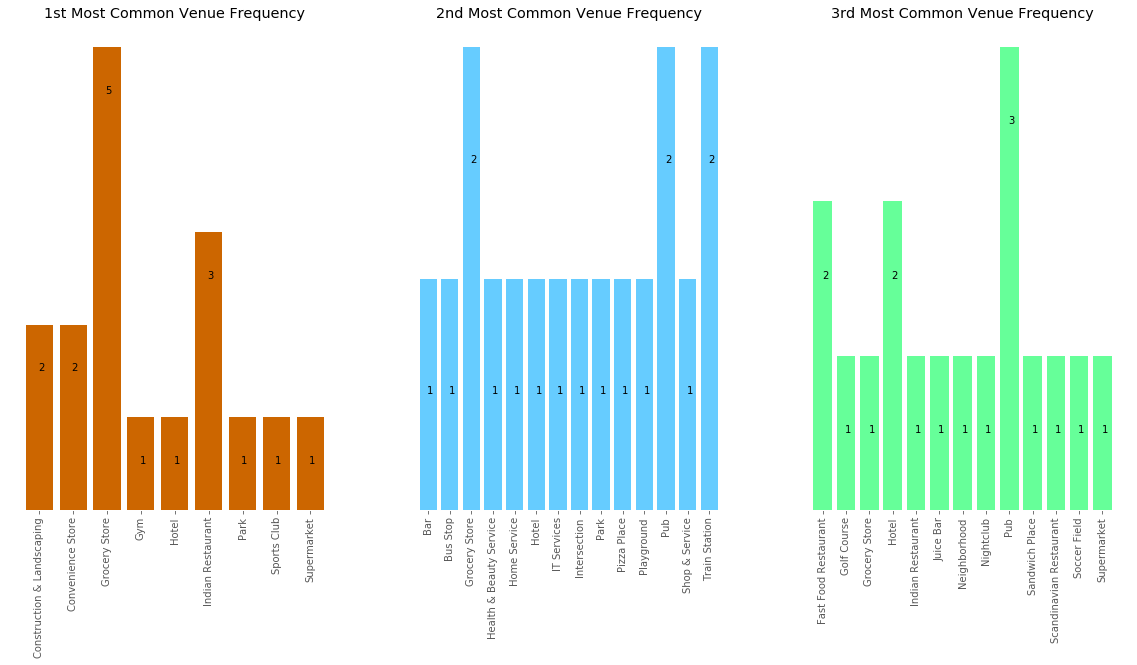

In [89]:
#to visualise this more easily, only the first three columns will be used to create a frequency plot of each of these columns

cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 0, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]

cluster_1st = cluster.groupby('1st Most Common Venue').size()
cluster_2nd = cluster.groupby('2nd Most Common Venue').size()
cluster_3rd = cluster.groupby('3rd Most Common Venue').size()

cluster_1st = cluster_1st.to_frame()
cluster_1st.reset_index(inplace = True)
cluster_1st.rename(columns={"1st Most Common Venue": "Venue", list(cluster_1st)[1]: 'Counts'}, inplace = True)

cluster_2nd = cluster_2nd.to_frame()
cluster_2nd.reset_index(inplace = True)
cluster_2nd.rename(columns={"2nd Most Common Venue": "Venue", list(cluster_2nd)[1]: 'Counts'}, inplace = True)

cluster_3rd = cluster_3rd.to_frame()
cluster_3rd.reset_index(inplace = True)
cluster_3rd.rename(columns={"3rd Most Common Venue": "Venue", list(cluster_3rd)[1]: 'Counts'}, inplace = True)


#all three plots will be shown side by side using the code below


fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(131)
ax1.set_title('1st Most Common Venue Frequency') 
ax1.bar(cluster_1st["Venue"], cluster_1st["Counts"], color='#cc6600')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(False)
ax1.patch.set_facecolor('white')
ax1.set_yticks([])

for p in ax1.patches:
    width, height = p.get_width(), p.get_height() 
    ax1.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

ax2 = fig.add_subplot(132)
ax2.bar(cluster_2nd["Venue"], cluster_2nd["Counts"], color='#66ccff')
ax2.set_title('2nd Most Common Venue Frequency')
ax2.tick_params(axis='x', rotation=90)
ax2.grid(False)
ax2.patch.set_facecolor('white')
ax2.set_yticks([])

for p in ax2.patches:
    width, height = p.get_width(), p.get_height() 
    ax2.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

ax3 = fig.add_subplot(133)
ax3.bar(cluster_3rd["Venue"], cluster_3rd["Counts"],color='#66ff99')
ax3.set_title('3rd Most Common Venue Frequency')
ax3.tick_params(axis='x', rotation=90)
ax3.grid(False)
ax3.patch.set_facecolor('white')
ax3.set_yticks([])

for p in ax3.patches:
    width, height = p.get_width(), p.get_height() 
    ax3.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

plt.show()

In [90]:
birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 1, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]

,postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,B1,Pub,Coffee Shop,Bar,Cocktail Bar,Indian Restaurant,Restaurant,Italian Restaurant,Hotel,Theater,Bistro
2,B11,Pakistani Restaurant,Indian Restaurant,Grocery Store,Pizza Place,Restaurant,Sandwich Place,Ski Area,Gas Station,Convenience Store,Asian Restaurant
3,B12,Indian Restaurant,Hookah Bar,Tea Room,Park,Pakistani Restaurant,Pub,Dessert Shop,Restaurant,Café,Electronics Store
4,B13,Pub,Park,Grocery Store,Café,Chinese Restaurant,Tennis Court,Rugby Stadium,Dog Run,Farmers Market,Falafel Restaurant
6,B15,Hotel,Coffee Shop,Sandwich Place,Gym,Gastropub,Pizza Place,Park,Spanish Restaurant,Shopping Mall,Restaurant
7,B16,Hotel,Coffee Shop,Pub,American Restaurant,Casino,Sandwich Place,Shopping Mall,Music Store,Electronics Store,Middle Eastern Restaurant
8,B17,Pub,Coffee Shop,Italian Restaurant,Bar,Bakery,Café,Sandwich Place,Pizza Place,Restaurant,Bookstore
9,B18,Pub,Coffee Shop,Museum,Bar,Plaza,Dessert Shop,Sandwich Place,Ethiopian Restaurant,Fast Food Restaurant,Gas Station
10,B19,Pub,Pizza Place,Soccer Stadium,Ethiopian Restaurant,Museum,Brewery,Music Venue,Sandwich Place,Supermarket,Bar
11,B2,Coffee Shop,Pub,Café,Cocktail Bar,Sandwich Place,Italian Restaurant,Shopping Mall,Burger Joint,Bar,Bistro


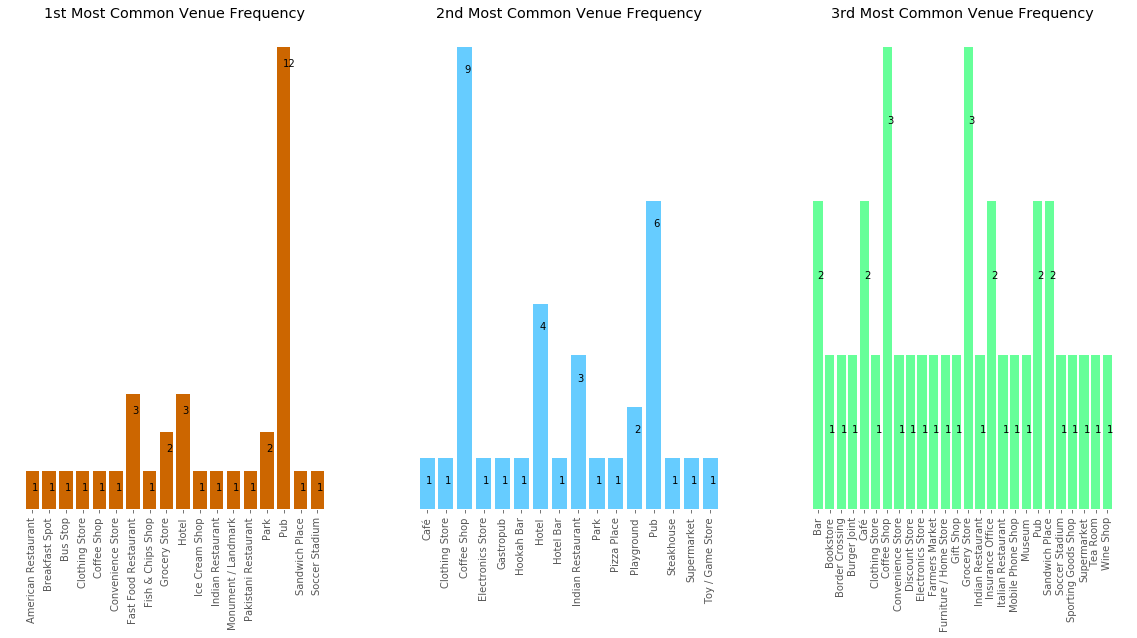

In [91]:
#to visualise this more easily, only the first three columns will be used to create a frequency plot of each of these columns

cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 1, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]

cluster_1st = cluster.groupby('1st Most Common Venue').size()
cluster_2nd = cluster.groupby('2nd Most Common Venue').size()
cluster_3rd = cluster.groupby('3rd Most Common Venue').size()

cluster_1st = cluster_1st.to_frame()
cluster_1st.reset_index(inplace = True)
cluster_1st.rename(columns={"1st Most Common Venue": "Venue", list(cluster_1st)[1]: 'Counts'}, inplace = True)

cluster_2nd = cluster_2nd.to_frame()
cluster_2nd.reset_index(inplace = True)
cluster_2nd.rename(columns={"2nd Most Common Venue": "Venue", list(cluster_2nd)[1]: 'Counts'}, inplace = True)

cluster_3rd = cluster_3rd.to_frame()
cluster_3rd.reset_index(inplace = True)
cluster_3rd.rename(columns={"3rd Most Common Venue": "Venue", list(cluster_3rd)[1]: 'Counts'}, inplace = True)


#all three plots will be shown side by side using the code below


fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(131)
ax1.set_title('1st Most Common Venue Frequency') 
ax1.bar(cluster_1st["Venue"], cluster_1st["Counts"], color='#cc6600')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(False)
ax1.patch.set_facecolor('white')
ax1.set_yticks([])

for p in ax1.patches:
    width, height = p.get_width(), p.get_height() 
    ax1.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

ax2 = fig.add_subplot(132)
ax2.bar(cluster_2nd["Venue"], cluster_2nd["Counts"], color='#66ccff')
ax2.set_title('2nd Most Common Venue Frequency')
ax2.tick_params(axis='x', rotation=90)
ax2.grid(False)
ax2.patch.set_facecolor('white')
ax2.set_yticks([])

for p in ax2.patches:
    width, height = p.get_width(), p.get_height() 
    ax2.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

ax3 = fig.add_subplot(133)
ax3.bar(cluster_3rd["Venue"], cluster_3rd["Counts"],color='#66ff99')
ax3.set_title('3rd Most Common Venue Frequency')
ax3.tick_params(axis='x', rotation=90)
ax3.grid(False)
ax3.patch.set_facecolor('white')
ax3.set_yticks([])

for p in ax3.patches:
    width, height = p.get_width(), p.get_height() 
    ax3.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

plt.show()

In [92]:
cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 2, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]
cluster

,postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,B46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,B79,Pub,Home Service,Café,Women's Store,Doner Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Ethiopian Restaurant


In [93]:
cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 3, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]
cluster

,postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,B33,Fast Food Restaurant,Pub,Supermarket,Train Station,Shopping Mall,Shop & Service,Dog Run,Farmers Market,Falafel Restaurant,Ethiopian Restaurant
29,B37,Fast Food Restaurant,Warehouse Store,Shopping Mall,Bar,Women's Store,Donut Shop,Food & Drink Shop,Fish & Chips Shop,Farmers Market,Falafel Restaurant
63,B78,Fast Food Restaurant,Furniture / Home Store,Athletics & Sports,Café,Supermarket,Grocery Store,Hardware Store,Convenience Store,Home Service,Fish & Chips Shop


In [99]:
cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 4, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]

In [100]:
cluster = birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 5, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]

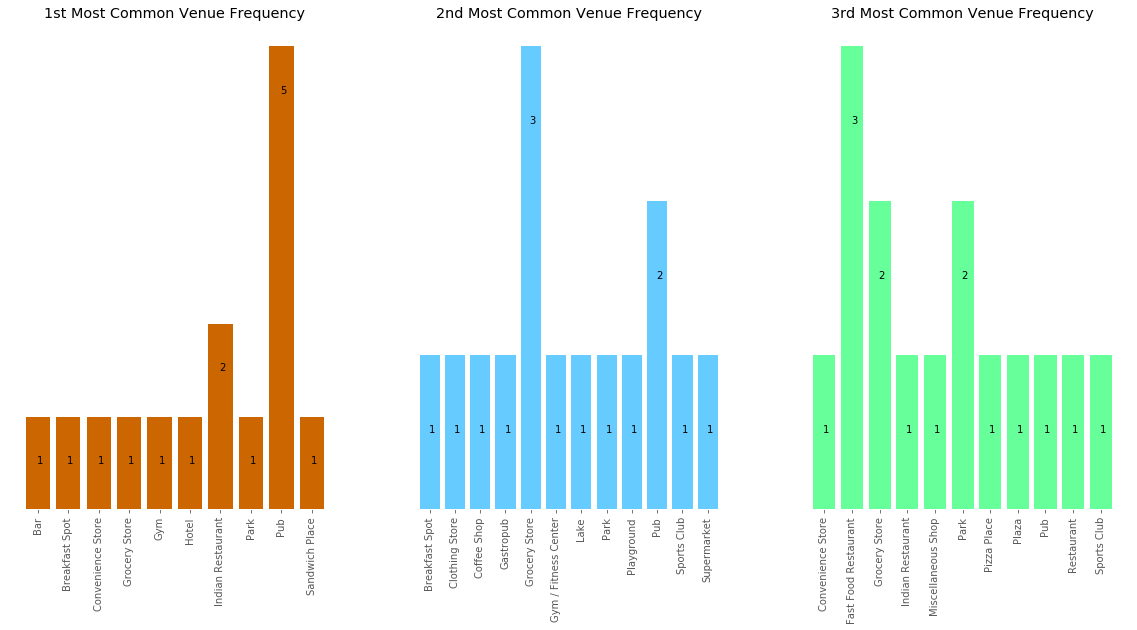

In [101]:
birmingham_merged.loc[birmingham_merged['Cluster Labels'] == 5, birmingham_merged.columns[[0] + list(range(4, birmingham_merged.shape[1]))]]

cluster_1st = cluster.groupby('1st Most Common Venue').size()
cluster_2nd = cluster.groupby('2nd Most Common Venue').size()
cluster_3rd = cluster.groupby('3rd Most Common Venue').size()

cluster_1st = cluster_1st.to_frame()
cluster_1st.reset_index(inplace = True)
cluster_1st.rename(columns={"1st Most Common Venue": "Venue", list(cluster_1st)[1]: 'Counts'}, inplace = True)

cluster_2nd = cluster_2nd.to_frame()
cluster_2nd.reset_index(inplace = True)
cluster_2nd.rename(columns={"2nd Most Common Venue": "Venue", list(cluster_2nd)[1]: 'Counts'}, inplace = True)

cluster_3rd = cluster_3rd.to_frame()
cluster_3rd.reset_index(inplace = True)
cluster_3rd.rename(columns={"3rd Most Common Venue": "Venue", list(cluster_3rd)[1]: 'Counts'}, inplace = True)


#all three plots will be shown side by side using the code below


fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(top=0.8)

ax1 = fig.add_subplot(131)
ax1.set_title('1st Most Common Venue Frequency') 
ax1.bar(cluster_1st["Venue"], cluster_1st["Counts"], color='#cc6600')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(False)
ax1.patch.set_facecolor('white')
ax1.set_yticks([])

for p in ax1.patches:
    width, height = p.get_width(), p.get_height() 
    ax1.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

ax2 = fig.add_subplot(132)
ax2.bar(cluster_2nd["Venue"], cluster_2nd["Counts"], color='#66ccff')
ax2.set_title('2nd Most Common Venue Frequency')
ax2.tick_params(axis='x', rotation=90)
ax2.grid(False)
ax2.patch.set_facecolor('white')
ax2.set_yticks([])

for p in ax2.patches:
    width, height = p.get_width(), p.get_height() 
    ax2.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))

ax3 = fig.add_subplot(133)
ax3.bar(cluster_3rd["Venue"], cluster_3rd["Counts"],color='#66ff99')
ax3.set_title('3rd Most Common Venue Frequency')
ax3.tick_params(axis='x', rotation=90)
ax3.grid(False)
ax3.patch.set_facecolor('white')
ax3.set_yticks([])
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about your possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_891763c871084fb5a08047331e704727.get_object(Bucket='applieddatasciencecapstoneproject-donotdelete-pr-vtupheonfiek7d', Key='cluster 5 (yellow).PNG')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 

for p in ax3.patches:
    width, height = p.get_width(), p.get_height() 
    ax3.annotate(str(height), (p.get_x() + .45 * width, p.get_y() + height - 0.5))